<img src="../img/logвtipo com cores oficiais.png" style="background-color:white;">

# Evasive PDF Samples
Project developed in the Artifial Intelligence course unit, in the second semester of the third year of the Bachelor's in Informatics and Computing Enginnering at FEUP.

Pedro Gomes, up202108825
<br>
Simão Rodrigues, up202005700

## Description
This project focuses on enhancing malware detection in PDF files by addressing evasion attacks, which are attempts to bypass existing detection mechanisms.

The dataset used consists of evasive PDF samples, labeled as either malicious (1) or benign (0).

By using machine learning algorithms, this project's main objective is to develop a malware detector in PDF files, capable of resisting evasion attacks.
We'll also test the results with other detectors, and evaluate the robustness of each algorithm in comparison with ours.

## References
1. https://www.kaggle.com/datasets/fouadtrad2/evasive-pdf-samples<br>
This is where the dataset was downloaded from, and from which the initial understanding of the project was obtained, as well as the description of the dataset's columns.
2. https://doi.org/10.3390/app13063472 - *Trad, F.; Hussein, A.; Chehab, A. Leveraging Adversarial Samples for Enhanced Classification of Malicious and Evasive PDF Files. Appl. Sci. 2023, 13, 3472.<br>*
This is the paper cited by the reference above. It provides a thorough study of the problem and information about the different approaches that can be taken.

## Importing Libraries

The libraries used in this project need to be installed before running it (You'll need python and pip installed beforehand).

To do so, run <code>pip install -r requirements.txt</code> in the project's root directory:

These are then imported into the project in the following code block:

In [ ]:
# import everything

import pandas as pd

## Create the dataframe, using pandas

For this, we need to read the CSV file that was given to us in the project's example dataset.

In [ ]:
# read the file and store it in the 'data' variable
data = pd.read_csv('../data/data.csv')

# output the header and the first 3 rows
# we're not using print() because the output in jupyter can be done without it - and it's prettier!
data.head(3)

## Dataset comprehension

This dataset contains 21 columns, which can be seen in the Python code block below.
Here's a description of them:
* <u>**pdfsize**</u> - Size of the PDF file in megabytes (MB).
* <u>**pages**</u> - Number of pages in the document.
* <u>**title characters</u>** - Total number of characters in the document's title.
* <u>**images**</u> - Number of images embedded within the document
* <u>**obj**</u> - Number of keywords /obj
* <u>**endobj**</u> - Number of keywords /endobj
* <u>**stream**</u> - Number of keywords /stream
* <u>**endstream**</u> - Number of keywords /endstream
* <u>**xref**</u> - Number of xref tables
* <u>**trailer**</u> - Number of keywords /trailer
* <u>**startxref**</u> - Number of keywords /startxref
* <u>**ObjStm**</u> - Number of keywords /Objstm (Object streams)
* <u>**JS**</u> - Number of keywords /JS
* <u>**OBS_JS**</u> - Number of keywords /JS (obfuscated)
* <u>**Javascript**</u> - Number of keywords /Javascript
* <u>**OBS_Javascript**</u> - Number of keywords /Javascript (obfuscated)
* <u>**OpenAction**</u> - Number of keywords /OpenAction
* <u>**OBS_OpenAction**</u> - Number of keywords /OpenAction (obfuscated)
* <u>**Acroform**</u> - Number of keywords /Acroform
* <u>**OBS_Acroform**</u> - Number of keywords /Acroform (obfuscated)
* <u>**class**</u> - Binary classification of the PDF file - Benign (0) or malicious (1)

In [ ]:
# print the number of columns
print(f'{len(data.columns)} columns')

# output the header and transpose it so that it's not collapsed
data.head(0).transpose()

## Exploratory Data Analysis (EDA)

Quick look at data characteristics and patterns.

In [ ]:
# Summarizes data points
data.describe()

In [ ]:
# Checks for any missing data in columns.
data.isnull().sum()

C:\Users\qrodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


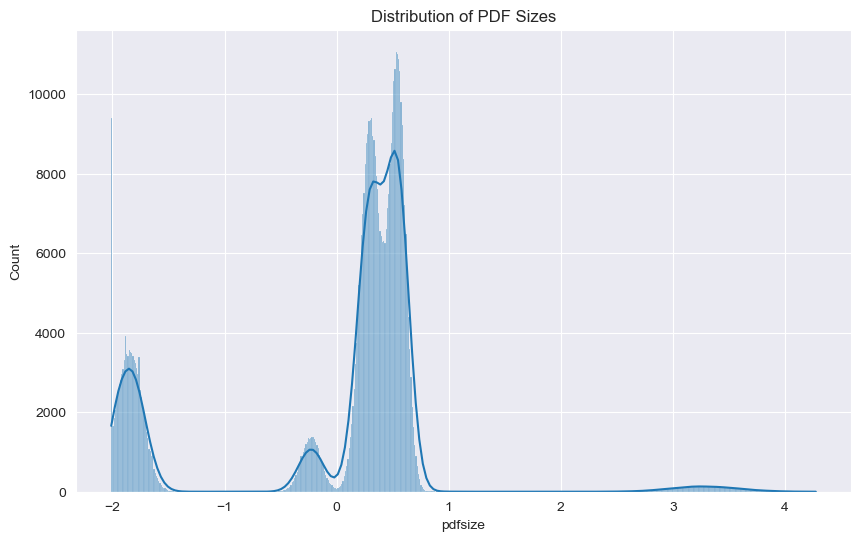

C:\Users\qrodr\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


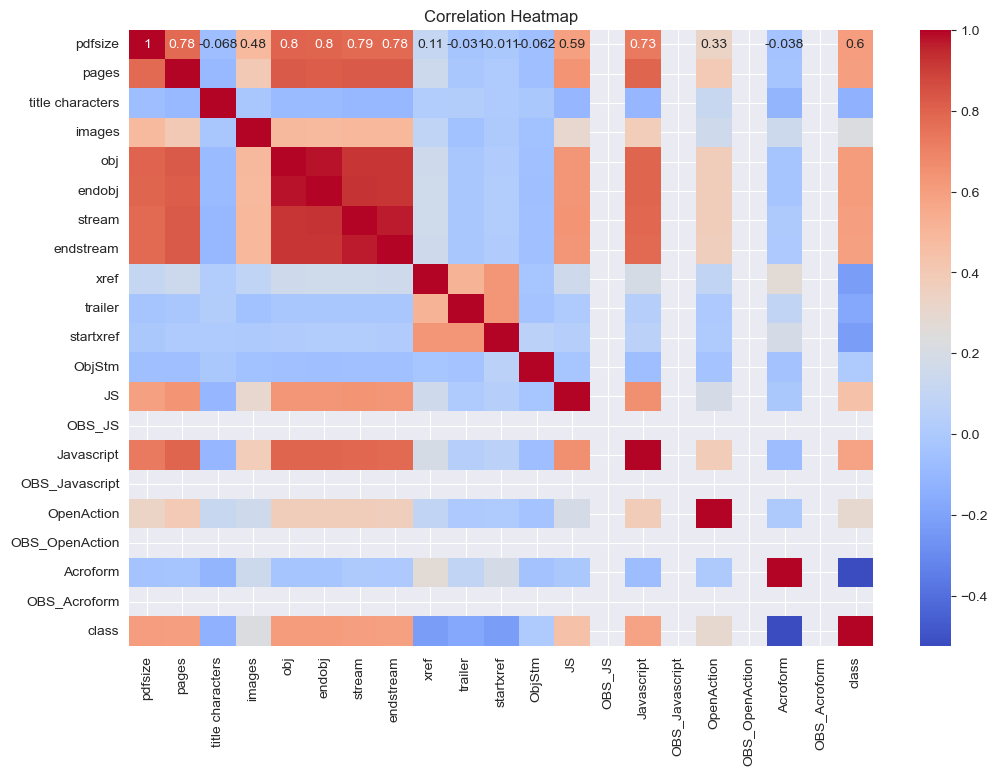

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='pdfsize', kde=True)
plt.title('Distribution of PDF Sizes')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Normalization

Normalize features to ensure consistent scale across dimensions for model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Define features to scale, excluding the target 'class'
features = data.columns.drop('class')
data[features] = scaler.fit_transform(data[features])

data.head()

## Data Splitting

Split the dataset into training and test sets to prepare for model validation.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the train and test sets.
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

## Model Training and Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialising and training the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

In [ ]:
# Forecasts and evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

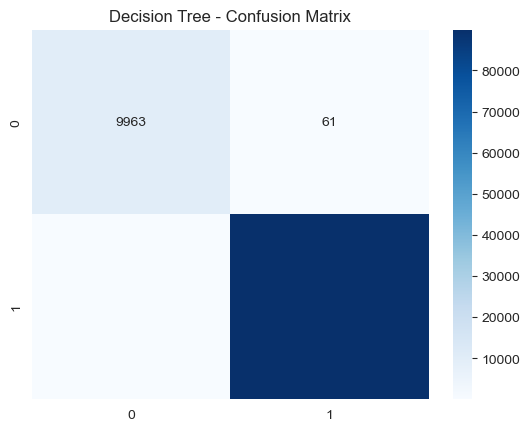

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10024
           1       1.00      1.00      1.00     89976

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



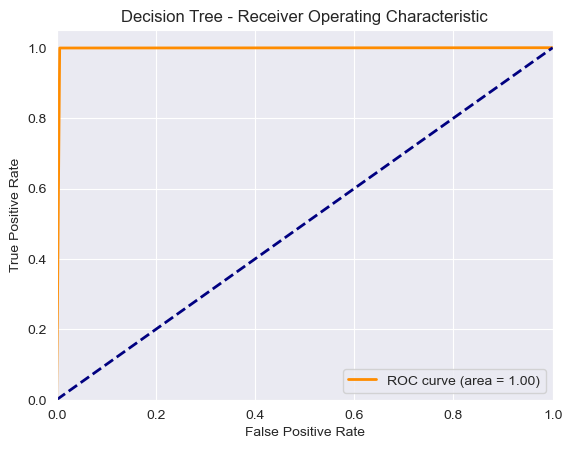

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)
dt_y_proba = dt_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# Classification Report
print("Decision Tree - Classification Report")
print(classification_report(y_test, dt_y_pred))

# ROC Curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba)
dt_roc_auc = auc(dt_fpr, dt_tpr)
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### K-Nearest Neighbors (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialising and training the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

In [ ]:
# Forecasts and evaluation
y_pred_knn = knn_model.predict(X_test)
print("K-NN Performance:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

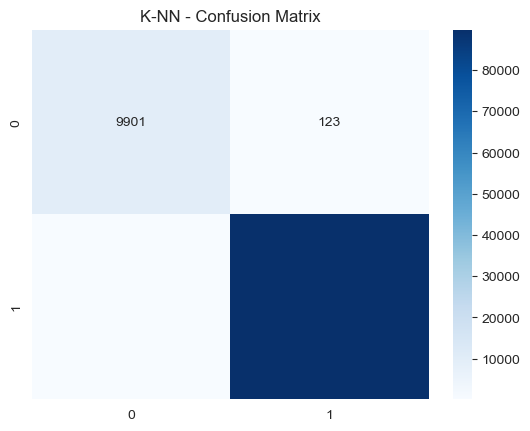

K-NN - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10024
           1       1.00      1.00      1.00     89976

    accuracy                           1.00    100000
   macro avg       0.99      0.99      0.99    100000
weighted avg       1.00      1.00      1.00    100000



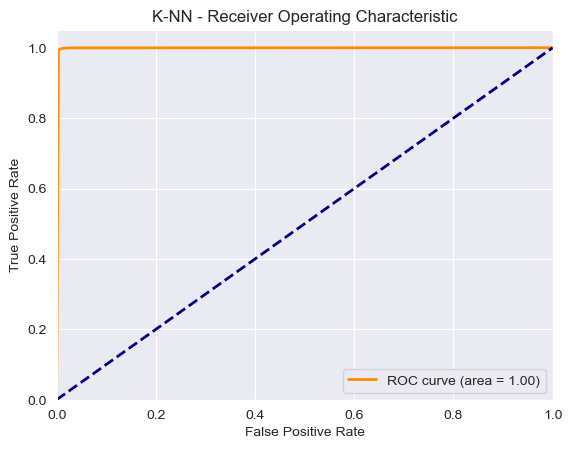

In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)
knn_y_proba = knn_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-NN - Confusion Matrix')
plt.show()

# Classification Report
print("K-NN - Classification Report")
print(classification_report(y_test, knn_y_pred))

# ROC Curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.figure()
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-NN - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialising and training the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

In [ ]:
# Forecasts and evaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Performance:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)
svm_y_proba = svm_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.show()

# Classification Report
print("SVM - Classification Report")
print(classification_report(y_test, svm_y_pred))

# ROC Curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.figure()
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialising and training the model
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train, y_train)

In [ ]:
# Forecasts and evaluation
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Performance:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

In [ ]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train, y_train)

mlp_y_pred = mlp_model.predict(X_test)
mlp_y_proba = mlp_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network (MLP) - Confusion Matrix')
plt.show()

# Classification Report
print("Neural Network (MLP) - Classification Report")
print(classification_report(y_test, mlp_y_pred))

# ROC Curve
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_y_proba)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)
plt.figure()
plt.plot(mlp_fpr, mlp_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network (MLP) - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Comparison of results

In [ ]:
# Function to collect performance metrics
def collect_metrics(model_name, y_true, y_pred):

    # model_name (str): Name of the model.
    # y_true (array): True labels.
    # y_pred (array): Predicted labels.

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_true, y_pred))
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics["Precision"].append(report['weighted avg']['precision'])
    metrics["Recall"].append(report['weighted avg']['recall'])
    metrics["F1-Score"].append(report['weighted avg']['f1-score'])

# Dictionary to store the metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Collecting metrics for each model
collect_metrics("Decision Tree", y_test, y_pred_dt)
collect_metrics("K-NN", y_test, y_pred_knn)
collect_metrics("SVM", y_test, y_pred_svm)
collect_metrics("Neural Network", y_test, y_pred_mlp)

# Creating a DataFrame for easy visualization
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['Decision Tree', 'SVM', 'K-NN', 'Neural Network (MLP)']
accuracies = [
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, svm_y_pred),
    accuracy_score(y_test, knn_y_pred),
    accuracy_score(y_test, mlp_y_pred)
]
precisions = [
    precision_score(y_test, dt_y_pred),
    precision_score(y_test, svm_y_pred),
    precision_score(y_test, knn_y_pred),
    precision_score(y_test, mlp_y_pred)
]
recalls = [
    recall_score(y_test, dt_y_pred),
    recall_score(y_test, svm_y_pred),
    recall_score(y_test, knn_y_pred),
    recall_score(y_test, mlp_y_pred)
]
f1_scores = [
    f1_score(y_test, dt_y_pred),
    f1_score(y_test, svm_y_pred),
    f1_score(y_test, knn_y_pred),
    f1_score(y_test, mlp_y_pred)
]
roc_aucs = [dt_roc_auc, svm_roc_auc, knn_roc_auc, mlp_roc_auc]

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparison of Model Accuracies')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Comparison of Model Precisions')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Comparison of Model Recalls')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('Comparison of Model F1 Scores')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='ROC AUC', data=results_df)
plt.title('Comparison of Model ROC AUCs')
plt.show()

## Results Analysis


Based on the results presented in the table, we can observe the following:


- Decision Tree achieved the highest accuracy, precision, recall, and F1-score among the models tested, with values of 99.88% across all metrics. This indicates that the Decision Tree model has a slightly superior performance in terms of correctly classifying examples.


- K-Nearest Neighbors (K-NN) also demonstrated very good performance, with an accuracy of 99.70% and metrics for precision, recall, and F1-score very close to the values of the Decision Tree. This suggests that K-NN is effective at correctly classifying the data.


- Support Vector Machine (SVM) had an accuracy of 99.65%, which is slightly lower than K-NN and Decision Tree but still very high. The precision, recall, and F1-score metrics also reflect a good overall performance.


- Neural Network presented an accuracy of 99.64%, which is slightly lower compared to the other models. However, the precision, recall, and F1-score metrics indicate that the neural network is also a competent model for the classification task.


In conclusion, although all models demonstrated very good performance, the Decision Tree stood out as the best model for this specific dataset. This might be due to its ability to capture complex interactions between features without much parameter tuning.

## Tools used

**Python**: For all back-end algorithms and data manipulation.

**Scikit-Learn**: Machine learning library for implementing various classification algorithms and data pre-processing.

**Pandas**: Data structures and data analysis tools for reading and manipulating data.

**NumPy**: Numerical computing with support for large, multi-dimensional arrays and matrices.

**Matplotlib/Seaborn**: Plotting libraries for visualizing the dataset and results.

**Jupyter Notebook / DataSpell**: Interactive computing environments where the project is being developed and documented.

## Approach

**Data Acquisition**: The dataset comprising evasive PDF samples was sourced and loaded for analysis.

**Exploratory Data Analysis (EDA)**: Conducted an initial exploration to understand data characteristics, including the distribution of features and checking for missing values.

**Data Preprocessing**: Normalized data using StandardScaler to ensure feature scaling and variance homogeneity.

**Data Splitting**: Segregated the dataset into training (80%) and test (20%) sets to prepare for unbiased model evaluation.

**Model Training and Evaluation**: Each model was trained with the training set and evaluated with the test set using metrics of accuracy, precision, recall, and F1-score.

**Comparison of Results**: Performance metrics of the different models were compared using a table.

**Results Analysis**: Interpreted the results based on the performance metrics of each model.